In [1]:
import json

# Load the JSON data
with open('data.json', 'r') as f:
    data = json.load(f)

print(data)

{'chr17_2': [485, 485, 485, 485, 485, 383, 383, 383, 73], 'chr9_2': [205, 205, 205, 205, 4, 205, 205, 4, 4, -1], 'M6': [1543, 1543, 1543, 1543, 1543, -1], 'chr11/2': [583, 583, 583, 583, 583, 583, 837, 837, 837], 'chr2': [4, 4, 4, 4, 4, 4], 'chr15': [414, 4, 296, 296, 296, 296, 296, 296, 296, 414, 414, 414, 414, 414, 414, 414, 414, 414, 414, 296, 296, 296, 414, 414, -1], 'M5': [192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, -1, -1, -1, -1], 'chr7_3': [481, 166, 481, 481, 481, 481, 481], 'chr1': [30, 30, 30, 30, 30, 30, 30, -1], 'chr7_2': [148, 371, 148, 148, 148, 148, 148, 148, 148, -1], 'chr9_1': [205, 4, 4, 4, 205, 205, -1], 'chr17_1': [73, 73, 73, 73, 73, 73, 383, -1, -1, -1], 'chr16': [1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082, 1082]}


In [27]:
gr_sizes = [61, 13, 46, 414, 30, 13, 17, 20, 55, 65, 25, 68, 64, 37, 45, 36, 21, 0]
gr_ids = [192, 481, 414, 4, 485, 837, 1543, 583, 73, 296, 166, 205, 371, 148, 30, 1082, 383, -1]

dic_comm_sizes = {i:j for i,j in zip(gr_ids, gr_sizes)}

dic_genes = {"chr1": "NBPF11",
             "chr2": "RANBP2",
             "chr7_2": "PMS2L5",
             "chr7_3": "PPY-19 like",
             "chr9_1": "C9orf36",
             "chr9_2": "ZNF790",
             "chr11/2": "SPRYD5",
             "chr15": "GOLGA",
             "chr16": "NPIP",
             "chr17_1": "LRRC37B",
             "chr17_2": "TBC1/USP6",
             "M5": "SMA",
             "M6": "CCDC127"}

/scratch/local/ipykernel_47395/2347189591.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([dic_genes[i] for i in ids], rotation=45, ha='right')


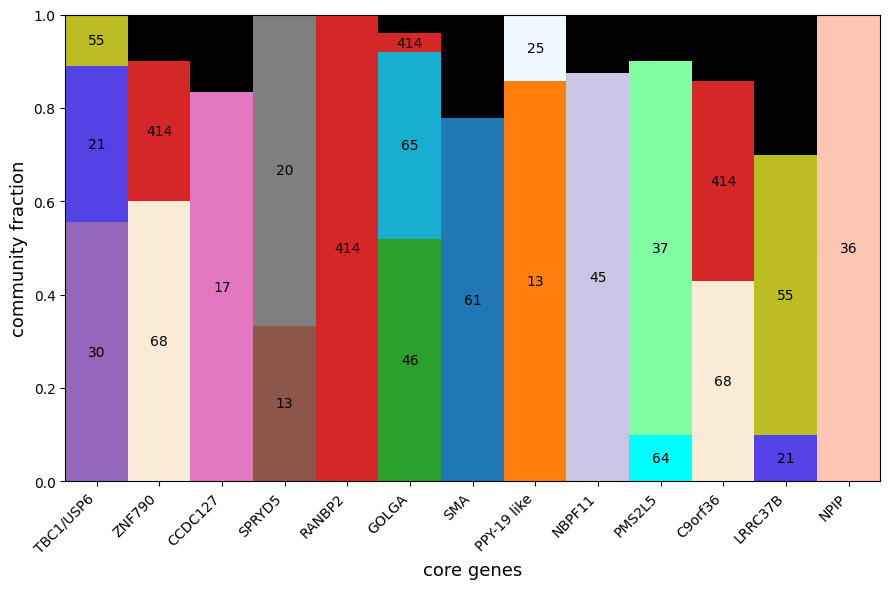

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from collections import Counter

ids = list(data.keys())
group_percentages = []
group_counts = []
unique_groups = []

# Calculate percentages and track unique groups
for array in data.values():
    counts = Counter(array)
    total = sum(counts.values())
    percentages = {key: count / total for key, count in counts.items()}
    group_percentages.append(percentages)
    group_counts.append(counts)  # Store counts for later
    unique_groups.extend(counts.keys())

# Get a unique list of all groups for color mapping
unique_groups = list(set(unique_groups))

# Generate a color palette with 30 distinguishable colors
color_palette = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
colors = {group: color_palette[i % len(color_palette)] for i, group in enumerate(unique_groups)}
colors[383] = '#5342e4'
colors[-1] = '#000000'
colors[296] = '#17aecf'
colors[148] = '#7FFFA1'
colors[30] = "#c8c6e4"
colors[1082] = "#fdc6b2"

unique_groups = sorted(unique_groups, reverse=True)

# Step 2: Plot the data
fig, ax = plt.subplots(figsize=(9, 6))

# Plot each group as a stacked segment in the bars
for i, (id_, percentages) in enumerate(zip(ids, group_percentages)):
    bottom = 0
    for group in unique_groups:
        percentage = percentages.get(group, 0)  # 0 if the group is not in this ID
        count = group_counts[i].get(group, 0)  # Get the actual count for this group
        bar = ax.bar(id_, percentage, bottom=bottom, color=colors[group], edgecolor='black', linewidth=0, width=1.01, label=str(group) if i == 0 else "")
        
        # Add text annotation for group count
        if count > 0:  # Only display counts for positive groups
            ax.text(bar[0].get_x() + bar[0].get_width() / 2, bottom + percentage / 2, dic_comm_sizes[group],
                    ha='center', va='center', color='k', fontsize=10)
        
        bottom += percentage

# Customizing plot
ax.set_ylabel("community fraction", fontsize=13)
ax.set_xlabel("core genes", fontsize=13)
ax.set_ylim(0, 1)
ax.set_xlim(-0.5, 12.5)
ax.set_xticklabels([dic_genes[i] for i in ids], rotation=45, ha='right')
#ax.legend(title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
#plt.savefig("../pics/communities.pdf")